In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
shots = pd.read_csv('shots_2020.csv')

In [50]:
shots.head()

,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,...,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
0,0,31.0,-75.0,75.0,28.0,28.0,0.0,0,0,0,...,74,0.157823,0.014253,0.459888,0.310161,0.018604,0.039270,0.727368,29,-29
1,1,45.0,51.0,51.0,-24.0,24.0,0.0,0,0,0,...,49,0.229722,0.022733,0.356649,0.331831,0.025545,0.033520,0.755237,-25,-25
2,2,47.0,-53.0,53.0,-30.0,30.0,-3.4,0,0,0,...,52,0.342825,0.018034,0.333151,0.254598,0.021434,0.029958,0.762454,-31,31
3,3,58.0,45.0,45.0,38.0,38.0,-2.4,0,0,0,...,43,0.209750,0.011926,0.391011,0.335451,0.024268,0.027594,0.726759,39,39
4,4,52.0,-48.0,48.0,32.0,32.0,0.0,0,0,0,...,46,0.175148,0.011392,0.407906,0.346867,0.024859,0.033828,0.698102,33,-33


<AxesSubplot:xlabel='yCordAdjusted', ylabel='xCordAdjusted'>

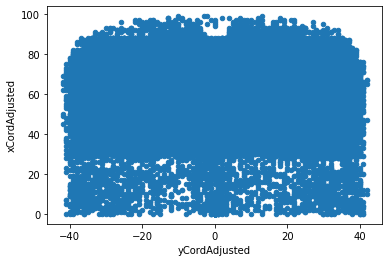

In [51]:
shots.plot.scatter(x = 'yCordAdjusted', y = 'xCordAdjusted')

In [52]:
shots.columns

Index(['shotID', 'arenaAdjustedShotDistance', 'arenaAdjustedXCord',
       'arenaAdjustedXCordABS', 'arenaAdjustedYCord', 'arenaAdjustedYCordAbs',
       'averageRestDifference', 'awayEmptyNet', 'awayPenalty1Length',
       'awayPenalty1TimeLeft',
       ...
       'xCordAdjusted', 'xFroze', 'xGoal', 'xPlayContinuedInZone',
       'xPlayContinuedOutsideZone', 'xPlayStopped', 'xRebound',
       'xShotWasOnGoal', 'yCord', 'yCordAdjusted'],
      dtype='object', length=137)

In [53]:
min(shots['yCordAdjusted'])

-42

# Converting SVG Coordinates to Rink Coordinates

In [54]:
def svg_to_rink_X(x):
    """Converts svg x coordinate to rink x coordinate"""
    return (x-74)*(84/252) - 42

def svg_to_rink_Y(y):
    """Converts svg y coordinate to rink y coordinate"""
    return (y-249)*(-64/189) + 25

### Convert X-SVG Coordinates to Rink Coordinates

In [55]:
print(svg_to_rink_X(184))
print(svg_to_rink_X(216))

-5.333333333333336
5.333333333333329


In [56]:
print(svg_to_rink_X(177))
print(svg_to_rink_X(223))

-7.666666666666671
7.666666666666664


In [57]:
print(svg_to_rink_X(167))
print(svg_to_rink_X(233))

-11.0
11.0


In [58]:
print(svg_to_rink_X(157))
print(svg_to_rink_X(243))

-14.333333333333336
14.333333333333329


### Convert Y-SVG Coordinates to Rink Coordinates

In [59]:
print(svg_to_rink_Y(70))

85.6137566137566


In [60]:
print(svg_to_rink_Y(120))

68.68253968253968


In [61]:
print(svg_to_rink_Y(165))

53.44444444444444


In [62]:
print(svg_to_rink_Y(180))

48.36507936507937


# Filtering Data to Be within zone of interest

In [63]:
shots = shots[shots['xCordAdjusted'] <= 89]
shots = shots[shots['xCordAdjusted'] >= 25]

<AxesSubplot:xlabel='yCordAdjusted', ylabel='xCordAdjusted'>

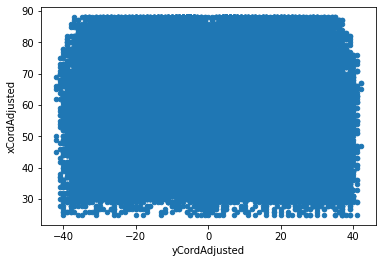

In [64]:
shots.plot.scatter(x = 'yCordAdjusted', y = 'xCordAdjusted')

# Find Rink Column

In [77]:
def partition_1_find_x(y):
    """Finds x coordinate on first vertical partition line
    given y-coordinate"""
    return (9/64)*(y-89) - 5.3333

def partition_2_find_x(y):
    """Finds x coordinate on second vertical partition line
    given y-coordinate"""
    return (-9/64)*(y-89) + 5.3333

In [84]:
#test
partition_1_find_x(25)

-14.333300000000001

In [82]:
#test
partition_2_find_x(25)

14.333300000000001

In [86]:
column_number = []

# looping thru each data point appending correct column
for index,row in shots.iterrows():
    x = row['yCordAdjusted']
    y = row['xCordAdjusted']
    
    if partition_1_find_x(y) >= x:
        column_number.append(0)
    elif partition_2_find_x(y) <= x:
        column_number.append(2)
    else:
        column_number.append(1)

In [88]:
shots['column_index'] = column_number

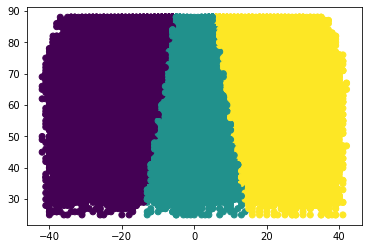

In [93]:
plt.scatter(shots['yCordAdjusted'], shots['xCordAdjusted'], c = shots['column_index'])

# Find Rink Rows

In [94]:
def partition_1_find_y(x):
    """Finds x coordinate on first vertical partition line
    given y-coordinate"""
    x = abs(x)
    return 0.489*(x-42) + 85.6

def partition_2_find_y(x):
    """Finds x coordinate on second vertical partition line
    given y-coordinate"""
    x = abs(x)
    return 0.161*(x-42) + 53.4

In [95]:
row_number = []

# looping thru each data point appending correct row
for index,row in shots.iterrows():
    x = row['yCordAdjusted']
    y = row['xCordAdjusted']
    col = row['column_index']
    
    if col == 1:
        if y >= 68.9:
            row_number.append(0)
            continue
        elif y >= 48.4:
            row_number.append(1)
            continue
        else:
            row_number.append(2)
            continue
            
    if y >= partition_1_find_y(x):
        row_number.append(0)
    elif y >= partition_2_find_y(x):
        row_number.append(1)
    else:
        row_number.append(2)

In [96]:
shots['row_index'] = row_number

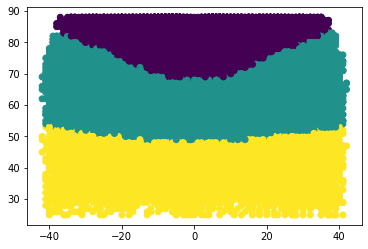

In [97]:
plt.scatter(shots['yCordAdjusted'], shots['xCordAdjusted'], c = shots['row_index'])

# Mapping Row and Column index to Zone Numbers

In [99]:
zones = []

# Looping thru each row and appending zone number
for index,row in shots.iterrows():
    r = row['row_index']
    c = row['column_index']
    
    if (r,c) == (0,0):
        zones.append(1)
    elif (r,c) == (0,1):
        zones.append(2)
    elif (r,c) == (0,1):
        zones.append(2)
    elif (r,c) == (0,2):
        zones.append(3)
    elif (r,c) == (1,0):
        zones.append(4)
    elif (r,c) == (1,1):
        zones.append(5)
    elif (r,c) == (1,2):
        zones.append(6)
    elif (r,c) == (2,0):
        zones.append(7)
    elif (r,c) == (2,1):
        zones.append(8)
    else:
        zones.append(9)

In [101]:
shots['zone'] = zones

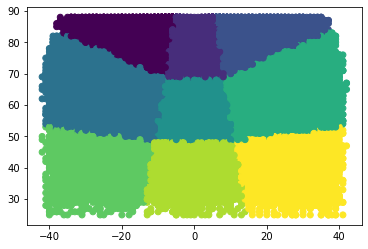

In [103]:
plt.scatter(shots['yCordAdjusted'], shots['xCordAdjusted'], c = shots['zone'])